<a href="https://colab.research.google.com/github/chacha86/pythonai2/blob/main/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## 회귀 -> 수치
## 분류 -> 범주
### 로지스틱 회귀(변수간의 관계)

### 선형회귀 -> 직선 찾기(가중치와 편향 찾기)
### 최적의 직선(파라미터)를 찾는 방법
### 손실함수, 경사하강
#### 손실함수 -> f(파라미터) -> 오차(손실)값
### 회귀 평가방법
#### MAE -> 평균절대오차에러 (낮을 수록 좋음)
#### MSE(RMSE) -> 평균제곱오차에러 (낮을 수록 좋음) -> 실제 오차값을 확인해서 사용 가능한 모델인지 판단하기 용이
#### R^2 -> 얼마나 잘 표현하는가? (높을 수록 좋음)

#### 집값 -> 30만원, 88%
#### 집값 -> 30만원, 평균 3만원의 오차가 있음

In [1]:
## 물고기 데이터를 이용해주세요.

## Bream, Smelt 두개의 어종만 선택
## 길이로 무게 예측
## MAE, RMSE, R^2 점수를 각각 출력
import pandas as pd


fish = pd.read_csv('/content/Fish.csv')




In [7]:
bream_smelt = fish.loc[(fish['Species'] == 'Bream') | (fish['Species'] == 'Smelt')]
train = bream_smelt[['Length1']]
target = bream_smelt['Weight']

In [8]:
from sklearn.model_selection import train_test_split
trd, tsd, trt, tst = train_test_split(train, target, train_size=0.8, random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(trd, trt)
lr.score(trd, trt), lr.score(tsd, tst)

(0.9260046748449194, 0.9071955874124416)

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## 예측 결과 - 실제 결과

predict_result = lr.predict(trd)
predict_result2 = lr.predict(tsd)

r2_score(trt, predict_result)
r2_score(tst, predict_result2)


0.9071955874124416

In [40]:
import math

mean_absolute_error(trt, predict_result)
math.sqrt(mean_squared_error(trt, predict_result))


87.1698835870801

In [ ]:
lr.predict([[34]])


In [45]:
## 회귀 -> 직선(파라미터) 찾기
## Smelt, Bream
## 분류 -> 특정 데이터를 줬을 때, 얘가 Smelt인지 Bream인지 판단(구별)

train = bream_smelt[['Length1', 'Weight']]
target = bream_smelt['Species']


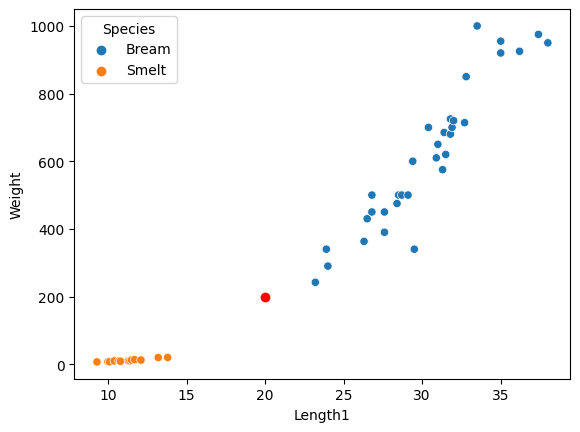

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=bream_smelt, x='Length1', y='Weight', hue='Species')
plt.scatter(x=20, y=200, color='red')

In [50]:
trd, tsd, trt, tst = train_test_split(train, target, train_size=0.8, random_state=42)

In [51]:
from sklearn.linear_model import LinearRegression, LogisticRegression

lr = LogisticRegression()

lr.fit(trd, trt)

lr.score(trd, trt), lr.score(tsd, tst)

(1.0, 1.0)

In [53]:
lr.predict([[20, 200]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Bream'], dtype=object)

In [55]:
lr.coef_, lr.intercept_

(array([[-0.00403067, -0.07925246]]), array([11.26963724]))

In [62]:
import numpy as np
## z = 길이 * w1 + 무게 * w2 + b

x1 = 20
x2 = 200


def decision_function(x1, x2) :
  z = -0.00403067 * x1 - 0.07925246 * x2 + 11.26963724
  return z

z = decision_function(20, 200)

print(z) # 값의 의미 -> 확률

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

sigmoid(z)

## 확률이 0에 가까움. -> 어떤 확률?? 양성일 확률
## 양성 -> 내가 관심있는 것

lr.classes_ ## 0 -> 음성, 1 -> 양성

z2 = decision_function(6, 30)
sigmoid(z2)



-4.66146816


0.9998591788976772

In [ ]:
## 로지스틱 회귀의 회귀선 그려보기
## w1 * x + w2 * y + b = 0 모델이 찾은 파라미터를 y에 대한 식으로 바꿈
##  y = (- w1 * x - b) / w2

## 모델이 찾은 파라미터 값 ([w1 : -0.00403067, w2 : -0.07925246]]), [b : 11.26963724]


## 회귀선 시각화
def my_func(x) :
  return (0.00403067 * x - 11.26963724) / -0.07925246

x = np.arange(0, 50, 0.1)
y = my_func(x)

sns.scatterplot(data=bream_smelt, x='Length1', y='Weight', hue='Species')
sns.lineplot(x=x, y=y)

## 로지스틱 회귀의 회귀선이 의미하는 것은 각 클래스간의 경계선을 의미한다.


In [ ]:
## 로지스틱 회귀, 시그모이드 -> 딥러닝 핵심 개념이므로 잘 알아둔다.